In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load data

In [5]:
path = "../data/water_dataset_reshaped.csv"
df = pd.read_csv(path)
df.head()

,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Target
0,0.001131,0.884615,0.001120,0.001113,0.677632,0.841463,0.765152,0.787402,0.293750,0.298077,0.276163,0.648148
1,0.001170,0.871795,0.001159,0.001152,0.703947,0.829268,0.772727,0.795276,0.293750,0.301282,0.276163,0.648148
2,0.001326,0.884615,0.001198,0.001250,0.677632,0.853659,0.750000,0.755906,0.300000,0.298077,0.287791,0.648148
3,0.014094,0.858974,0.001238,0.003926,0.697368,0.829268,0.772727,0.771654,0.296875,0.294872,0.279070,0.638889
4,0.088109,0.858974,0.010766,0.029297,0.684211,0.853659,0.765152,0.755906,0.296875,0.291667,0.281977,0.648148


# Adding categorical variables to data

In [6]:
categorical = ["Hardness", "Mineral content"]
hardness = ["soft", "hard"]
hardness_prob = [0.4, 0.6]
mineral = ["low", "high"]
mineral_prob = [0.8, 0.2]

hardness_sample = np.random.choice(hardness, size=len(df), p=hardness_prob)
mineral_sample = np.random.choice(mineral, size=len(df), p=mineral_prob)

df["Hardness"] = hardness_sample
df["Mineral content"] = mineral_sample

In [7]:
columns = [col for col in df if col != 'Target'] + ['Target']
df = df[columns]
df.head()

,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Hardness,Mineral content,Target
0,0.001131,0.884615,0.001120,0.001113,0.677632,0.841463,0.765152,0.787402,0.293750,0.298077,0.276163,soft,low,0.648148
1,0.001170,0.871795,0.001159,0.001152,0.703947,0.829268,0.772727,0.795276,0.293750,0.301282,0.276163,hard,high,0.648148
2,0.001326,0.884615,0.001198,0.001250,0.677632,0.853659,0.750000,0.755906,0.300000,0.298077,0.287791,soft,low,0.648148
3,0.014094,0.858974,0.001238,0.003926,0.697368,0.829268,0.772727,0.771654,0.296875,0.294872,0.279070,hard,low,0.638889
4,0.088109,0.858974,0.010766,0.029297,0.684211,0.853659,0.765152,0.755906,0.296875,0.291667,0.281977,hard,high,0.648148


# Distribution of categorical variables

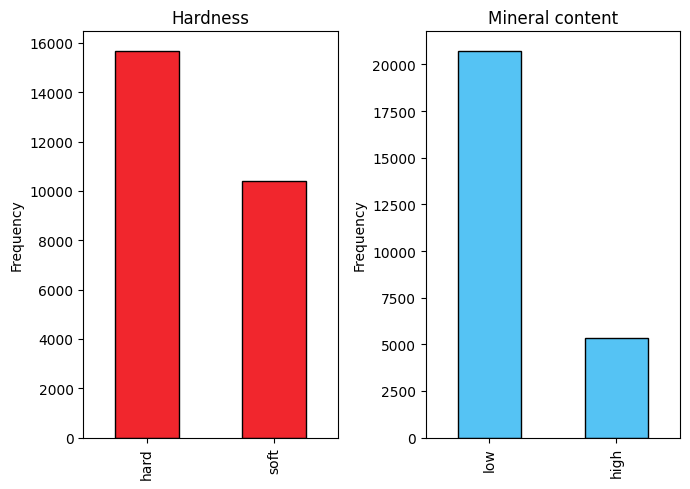

In [8]:
def random_color():
    return (np.random.random(), np.random.random(), np.random.random())

fig, axes = plt.subplots(1, 2, figsize=(7, 5))
axes = axes.flatten()

for idx, c in enumerate(categorical):
    category_counts = df[c].value_counts()
    category_counts.plot(kind='bar', ax=axes[idx], color=random_color(), edgecolor="black")
    axes[idx].set_title(c)
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Calculating means, z values, kurtosis and skewness of continuous variables

In [9]:
def calculate_excess_kurtosis(n, z_values):
    coef = (n*(n+1)) / ((n-1)*(n-2)*(n-3))
    z_sum = np.sum(z_values**4)
    substractor = (3*(n-1)**2) / ((n-2)*(n-3))
    kurtosis = coef * z_sum - substractor
    return kurtosis

def calculate_skewness(n, z_values):
    coef = n / ((n-1)*(n-2))
    z_sum = np.sum(z_values**3)
    skewness = coef * z_sum
    return skewness

def get_kurtosis_interpretation(kurtosis):
    if kurtosis > 7.5:
        return "High kurtosis, heavy tails"
    elif kurtosis >= 0:
        return "Moderate kurtosis, close to normal dist"
    else:
        return "Low kurtosis, light tails, flatter dist"
    
def get_skewness_interpretation(skewness):
    if skewness > 0.05:
        return "Right skewed distribution, right tail"
    elif skewness >= 0:
        return "Relatively symmetrical, normal-like"
    else:
        return "Left skewed distribution, left tail"

In [10]:
continuous_columns = list(df.columns[:11]) + ["Target"]

kurtosis_list = []
skewness_list = []
means_list = []
z_values_list = []

for c in continuous_columns:
    mean = df[c].mean()
    std = df[c].std()
    z_values = (df[c] - mean) / std
    kurtosis = calculate_excess_kurtosis(len(df[c]), z_values)
    skewness = calculate_skewness(len(df[c]), z_values)
    kurtosis_data = {"kurtosis": np.round(kurtosis, 3), "interpretation": get_kurtosis_interpretation(kurtosis)}
    skewness_data = {"skewness": np.round(skewness, 3), "interpretation": get_skewness_interpretation(skewness)}
    kurtosis_list.append(kurtosis_data)
    skewness_list.append(skewness_data)
    means_list.append(float(np.round(mean, 3)))
    z_values_list.append(z_values)

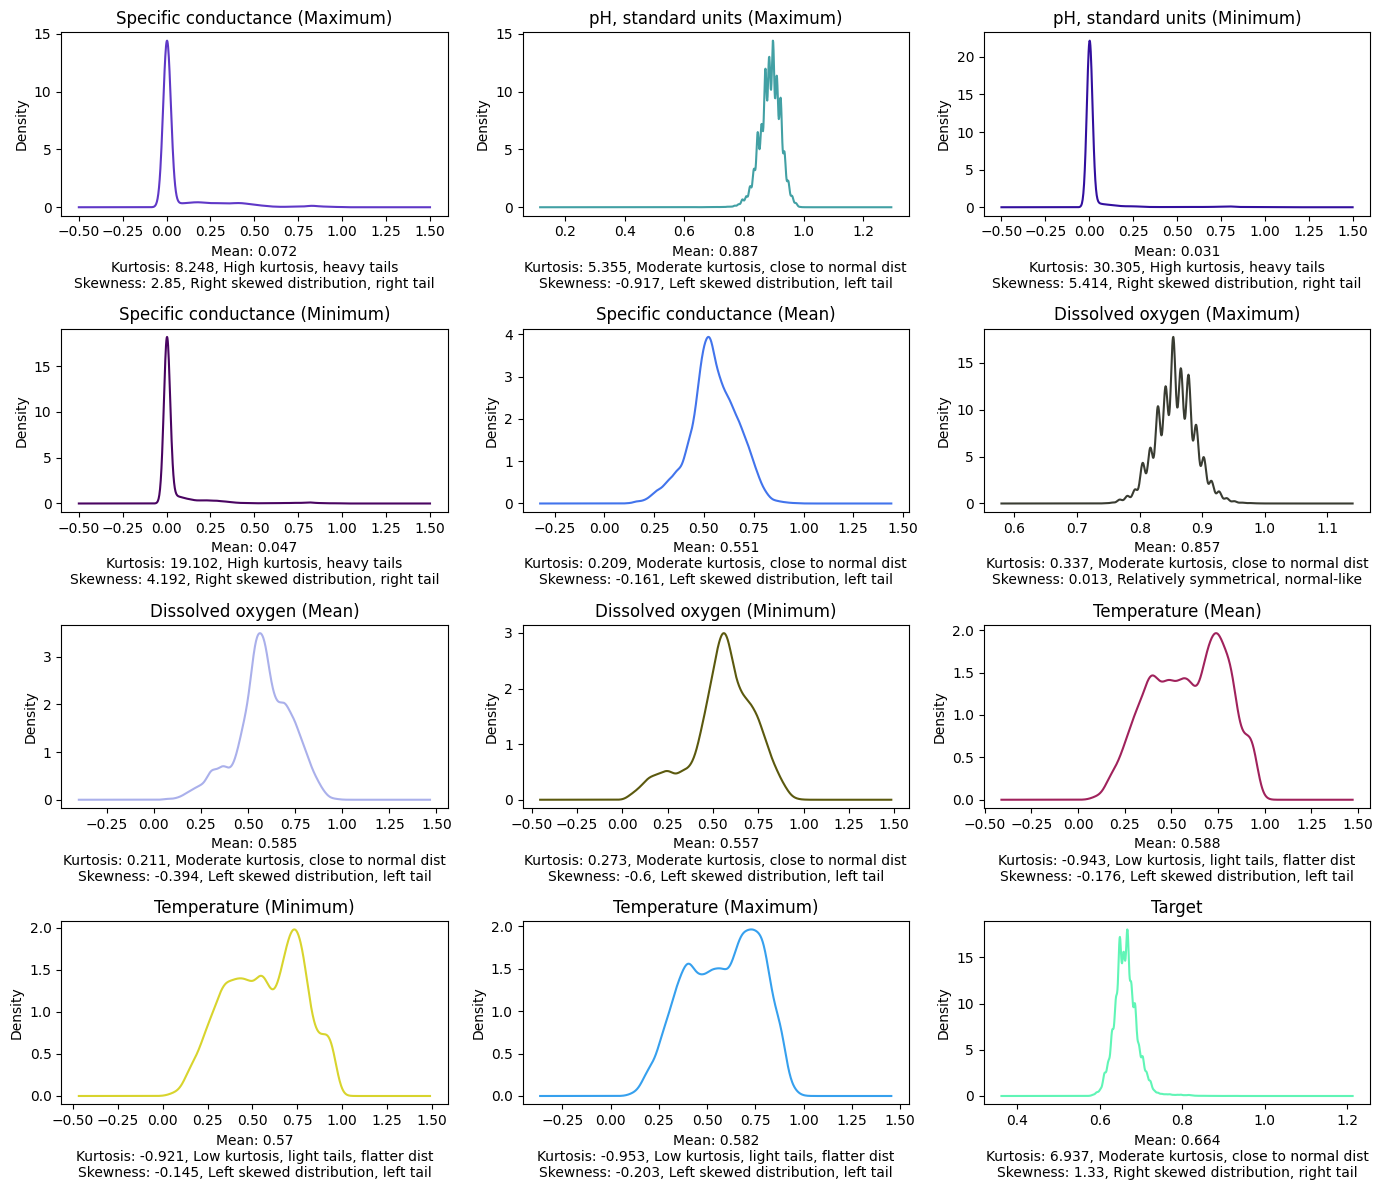

In [11]:
fig, axes = plt.subplots(4, 3, figsize=(14, 12))
axes = axes.flatten()

for idx, c in enumerate(continuous_columns):
    df[c].plot(kind='density', ax=axes[idx], color=random_color())
    axes[idx].set_title(c)
    mean_string = f'Mean: {means_list[idx]}'
    kurtosis_string = f'Kurtosis: {kurtosis_list[idx]["kurtosis"]}, {kurtosis_list[idx]["interpretation"]}'
    skewness_string = f'Skewness: {skewness_list[idx]["skewness"]}, {skewness_list[idx]["interpretation"]}'
    x_string = mean_string + "\n" + kurtosis_string + "\n" + skewness_string
    axes[idx].set_xlabel(x_string)

plt.tight_layout()
plt.show()

# Correlation with target variable

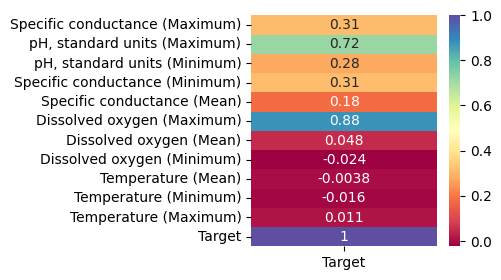

In [12]:
target_corr = df[continuous_columns].corr()["Target"]
values = target_corr.values.reshape(-1, 1)

plt.figure(figsize=(3, 3))
sns.heatmap(values, annot=True, yticklabels=target_corr.index, xticklabels=["Target"] ,cmap="Spectral")
plt.show()

# Correlation using categorised z-values with target variable

In [13]:
z_values_df = pd.DataFrame(z_values_list).T
z_values_df.head()

,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Target
0,-0.418730,-0.077239,-0.244328,-0.336285,1.058496,-0.506095,1.230028,1.330990,-1.469916,-1.301145,-1.637841,-0.522708
1,-0.418498,-0.439543,-0.244006,-0.335999,1.278365,-0.897377,1.281808,1.376548,-1.469916,-1.285785,-1.637841,-0.522708
2,-0.417572,-0.077239,-0.243685,-0.335285,1.058496,-0.114812,1.126469,1.148759,-1.438729,-1.301145,-1.575507,-0.522708
3,-0.341756,-0.801847,-0.243363,-0.315708,1.223398,-0.897377,1.281808,1.239874,-1.454322,-1.316505,-1.622258,-0.837804
4,0.097747,-0.801847,-0.165414,-0.130093,1.113463,-0.114812,1.230028,1.148759,-1.454322,-1.331865,-1.606674,-0.522708


In [14]:
categorised_df = pd.DataFrame([pd.cut(z_values_df[c], [float("-inf"), -3, 3, float("inf")]) for c in z_values_df.columns]).T
categorised_df.head()

,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Target
0,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
1,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
2,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
3,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"
4,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]"


# Correlation categorical-categorical using Chi-Square test and Cramer's V

In [15]:
from scipy.stats import chi2_contingency

def cramers_v(chi2, n, k, l):
    return np.sqrt(chi2 / (n * min(k - 1, l - 1)))

chi2_data = []

for c in continuous_columns:
    contingency_table = pd.crosstab(categorised_df[c], categorised_df["Target"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    k = contingency_table.shape[0]
    l = contingency_table.shape[1]
    v = cramers_v(chi2, n, k, l)
    chi2_data.append((chi2, v))

/tmp/ipykernel_15965/223821288.py:4: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(k - 1, l - 1)))
/tmp/ipykernel_15965/223821288.py:4: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(k - 1, l - 1)))
/tmp/ipykernel_15965/223821288.py:4: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * min(k - 1, l - 1)))


In [16]:
cramer_df = pd.DataFrame(chi2_data).T
cramer_df.columns = continuous_columns
cramer_df.index = ["Chi Square", "Cramers V"]
cramer_df

,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Target
Chi Square,7.521212,73.352835,7.680293,7.566646,1906.849035,7146.078053,0.821085,0.247981,0.0,0.0,0.0,52170.0
Cramers V,0.016980,0.037497,0.017159,0.017032,0.191182,0.370104,0.005610,0.003083,NaN,NaN,NaN,1.0


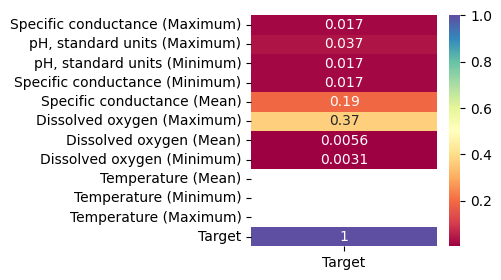

In [17]:
values = cramer_df.loc["Cramers V"].values.reshape(-1, 1)

plt.figure(figsize=(3, 3))
sns.heatmap(values, annot=True, yticklabels=target_corr.index, xticklabels=["Target"], cmap="Spectral")
plt.show()

# Correlation categorical-continuous using Spearman's Rank Correlation

In [18]:
categorised_df["Target"] = df["Target"].copy()
categorised_df.head()

,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Target
0,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]",0.648148
1,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]",0.648148
2,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]",0.648148
3,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]",0.638889
4,"(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]","(-3.0, 3.0]",0.648148


In [19]:
from scipy.stats import spearmanr

spearman_list = []

for c in continuous_columns:
    correlation, p_value = spearmanr(categorised_df["Target"], categorised_df[c])
    spearman_list.append((correlation, p_value))

/tmp/ipykernel_15965/1288308487.py:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = spearmanr(categorised_df["Target"], categorised_df[c])


In [20]:
spearman_df = pd.DataFrame(spearman_list).T
spearman_df.columns = continuous_columns
spearman_df.index = ["Spearman Correlation", "P value"]
spearman_df

,Specific conductance (Maximum),"pH, standard units (Maximum)","pH, standard units (Minimum)",Specific conductance (Minimum),Specific conductance (Mean),Dissolved oxygen (Maximum),Dissolved oxygen (Mean),Dissolved oxygen (Minimum),Temperature (Mean),Temperature (Minimum),Temperature (Maximum),Target
Spearman Correlation,2.279916e-01,5.566810e-02,0.235847,0.232832,0.002668,1.255773e-01,-0.020997,-0.019100,NaN,NaN,NaN,1.0
P value,9.999957e-305,2.310864e-19,0.000000,0.000000,0.666600,3.673846e-92,0.000695,0.002036,NaN,NaN,NaN,0.0


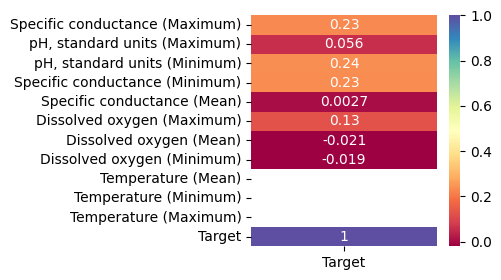

In [21]:
values = spearman_df.loc["Spearman Correlation"].values.reshape(-1, 1)

plt.figure(figsize=(3, 3))
sns.heatmap(values, annot=True, yticklabels=target_corr.index, xticklabels=["Target"], cmap="Spectral")
plt.show()

# Observations

- getting NaN values in Cramer's V and Spearman correlation indicates there is no variance in the columns, meaning columns Temperature (Mean), Temperature (Minimum) and Temperature (Maximum) z-values when converted to a categorical range they all have the same value, meaning their z-values fall into the same category (-3, 3]

In [22]:
print(categorised_df["Temperature (Mean)"].value_counts(), "\n-----------------------------")
print(categorised_df["Temperature (Minimum)"].value_counts(), "\n-----------------------------")
print(categorised_df["Temperature (Maximum)"].value_counts(), "\n-----------------------------")

Temperature (Mean)
(-3.0, 3.0]    26085
Name: count, dtype: int64 
-----------------------------
Temperature (Minimum)
(-3.0, 3.0]    26085
Name: count, dtype: int64 
-----------------------------
Temperature (Maximum)
(-3.0, 3.0]    26085
Name: count, dtype: int64 
-----------------------------


- columns Dissolved oxygen (Maximum) and pH (Maximum) correlate the most with the target variable

- target variable is similar to normal distribution and is right skewed